In [1]:
from paths import metadata_folder

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyobsbox import ObsBoxGenerator
from pyobsbox.utils import H5_PLANE_KEY
from tqdm.auto import tqdm

In [3]:
plt.rcParams["figure.figsize"] = (16, 4)

# List metadata files

In [4]:
list(metadata_folder.glob("metadata_*"))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2H_Inst_23528.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_32.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_1024.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_34994.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1V_Inst_51335.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B2V_Inst_60652.h5')]

In [5]:
metadata_file = metadata_folder / "metadata_B1H_Inst_34994.h5"

In [6]:
metadata = pd.read_hdf(metadata_file)
metadata.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
1,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,0.0,0.0,65536
2,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,4.0,1.0,65536
3,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,8.0,2.0,65536
4,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,12.0,3.0,65536
5,Inst,7478,1,h,7,2018-11-27 14:49:16,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7478/...,20,894.0,4.0,65536


# Select a random sample to vizualize

In [7]:
viz_sample = metadata.sample(20, replace=False)
viz_sample.head()

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
9219592,Inst,7467,1,h,7,2018-11-23 12:51:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7467/...,733,637.0,132.0,65536
3042275,Inst,6603,1,h,7,2018-04-23 19:46:13,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6603/...,516,445.0,348.0,65536
2861399,Inst,7468,1,h,7,2018-11-23 20:41:15,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/...,733,318.0,65.0,65536
1262458,Inst,6628,1,h,7,2018-05-01 05:29:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/...,1551,2970.0,1298.0,65536
7438432,Inst,7264,1,h,7,2018-10-07 00:53:36,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...,924,349.0,248.0,65536


# Load the data

In [8]:
data = []
for file_path, df in tqdm(viz_sample.groupby("file")):
    beam = df.beam.iloc[0]
    plane = df.plane.iloc[0]
    with h5py.File(file_path, 'r') as store:
        data.append(store["B{}".format(beam)][H5_PLANE_KEY[plane]][:, df['bunch_index'].sort_values()].T)
data = np.vstack(data)
data.shape

(20, 65536)

# Plot

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7467/instability_data/07467_Inst_B1H_Q7_20181123_12h51m14s.h5


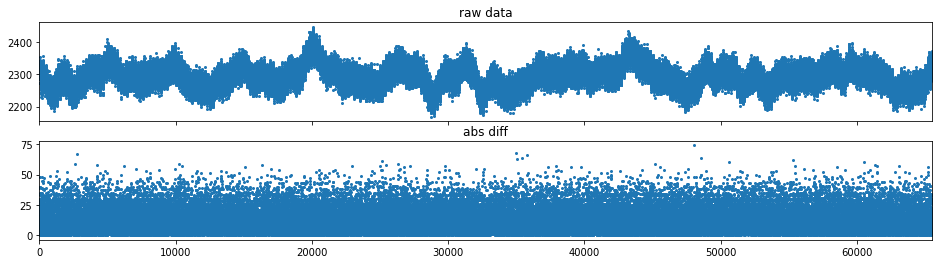

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6603/instability_data/06603_Inst_B1H_Q7_20180423_19h46m13s.h5


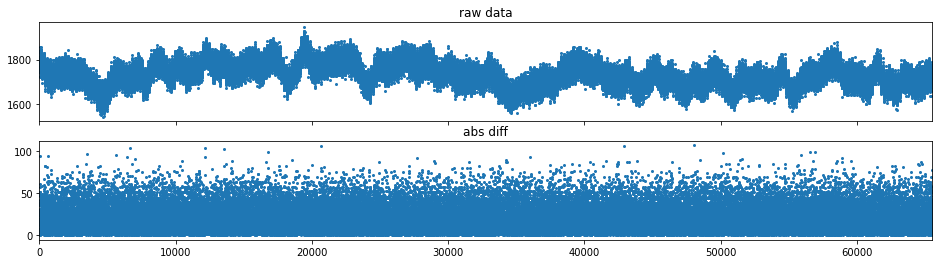

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7468/instability_data/07468_Inst_B1H_Q7_20181123_20h41m15s.h5


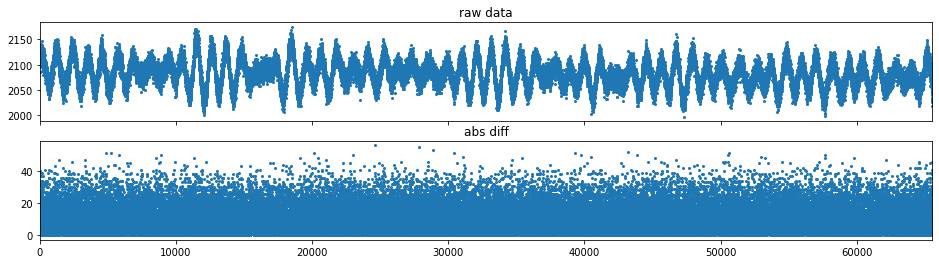

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/instability_data/06628_Inst_B1H_Q7_20180501_05h29m14s.h5


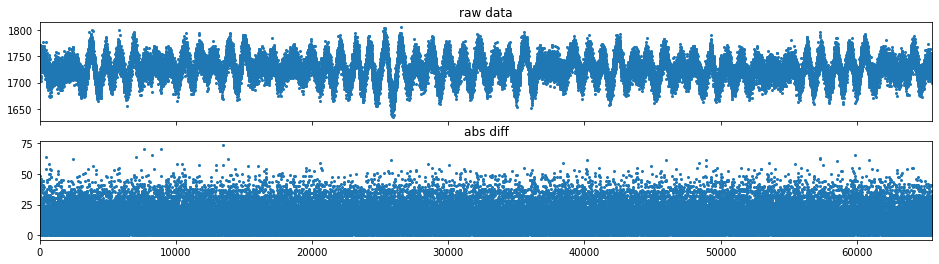

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/instability_data/07264_Inst_B1H_Q7_20181007_00h53m36s.h5


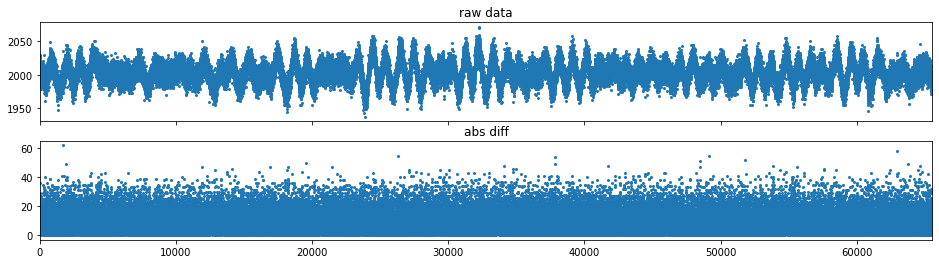

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/instability_data/06215_Inst_B1H_Q7_20170916_23h40m14s.h5


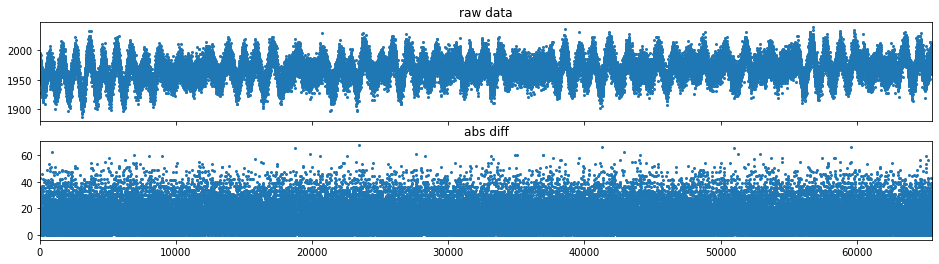

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/instability_data/06276_Inst_B1H_Q7_20171006_18h46m14s.h5


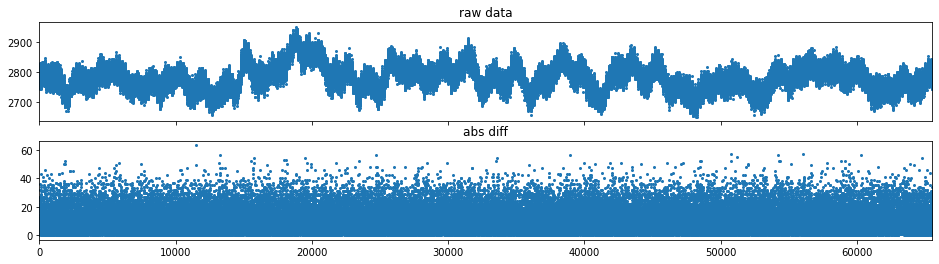

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7120/instability_data/07120_Inst_B1H_Q7_20180902_22h34m56s.h5


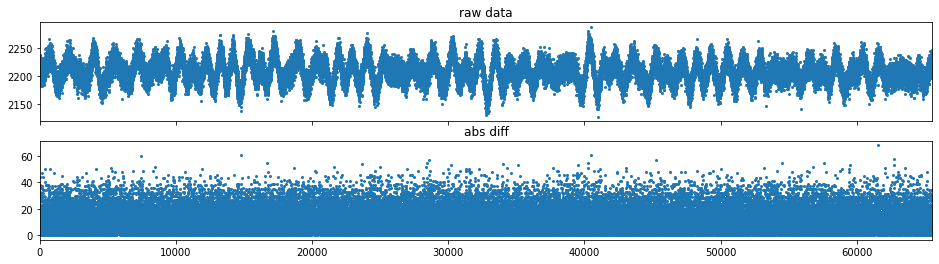

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6972/instability_data/06972_Inst_B1H_Q7_20180724_21h20m14s.h5


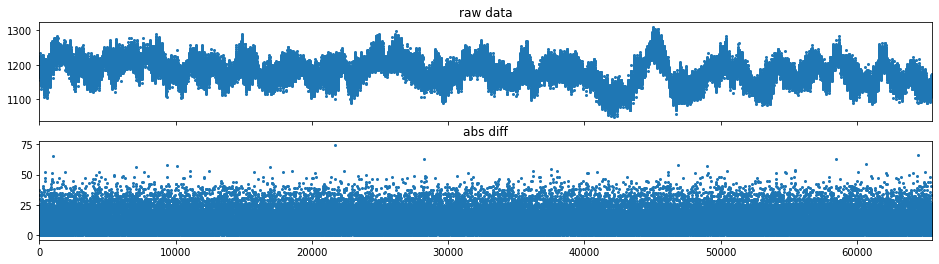

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7098/instability_data/07098_Inst_B1H_Q7_20180829_06h19m35s.h5


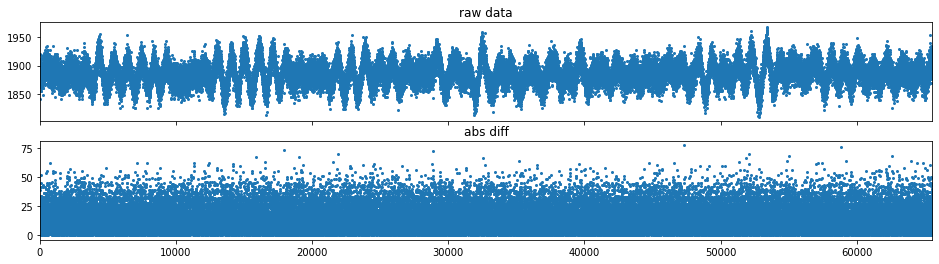

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6762/instability_data/06762_Inst_B1H_Q7_20180606_15h30m15s.h5


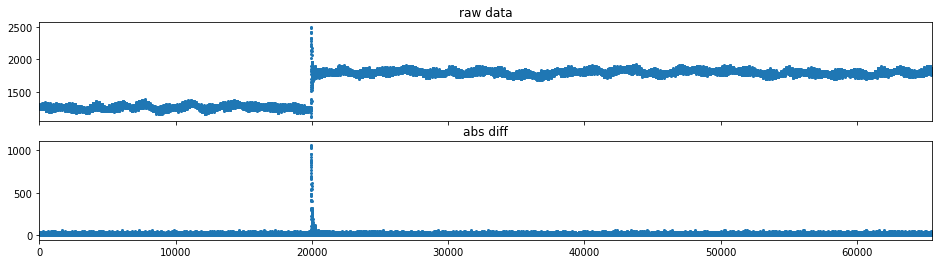

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/instability_data/06390_Inst_B1H_Q7_20171115_15h39m13s.h5


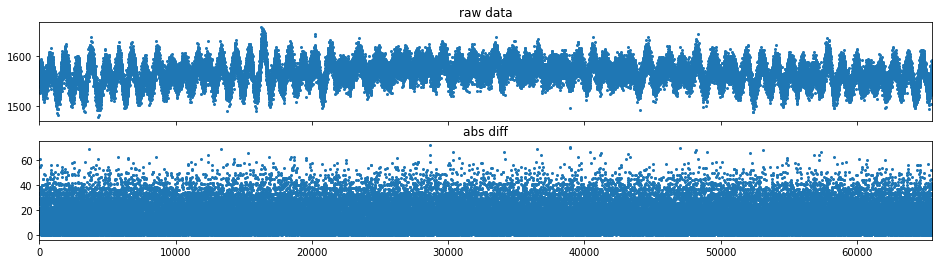

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6744/instability_data/06744_Inst_B1H_Q7_20180531_03h33m58s.h5


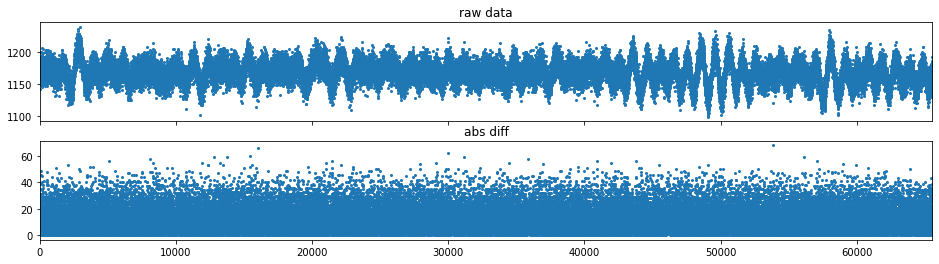

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/instability_data/06356_Inst_B1H_Q7_20171102_07h44m14s.h5


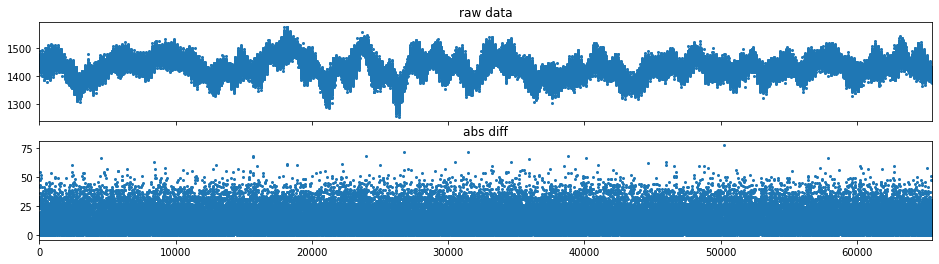

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7018/instability_data/07018_Inst_B1H_Q7_20180804_00h53m05s.h5


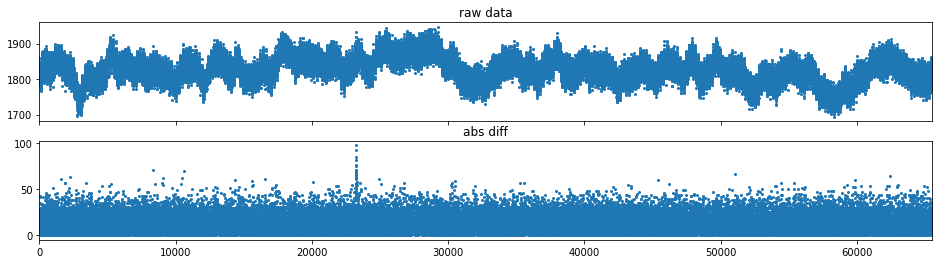

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6404/instability_data/06404_Inst_B1H_Q7_20171121_19h39m14s.h5


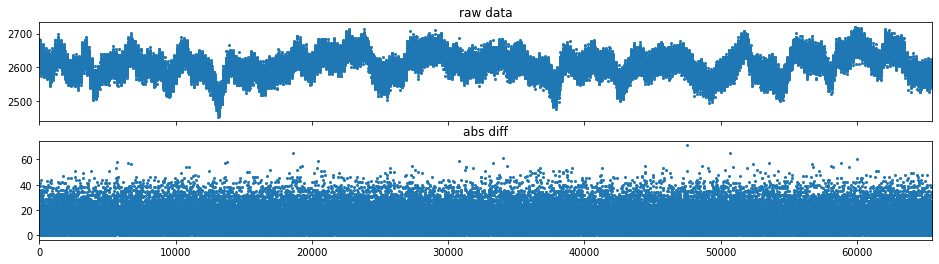

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6183/instability_data/06183_Inst_B1H_Q7_20170909_20h09m08s.h5


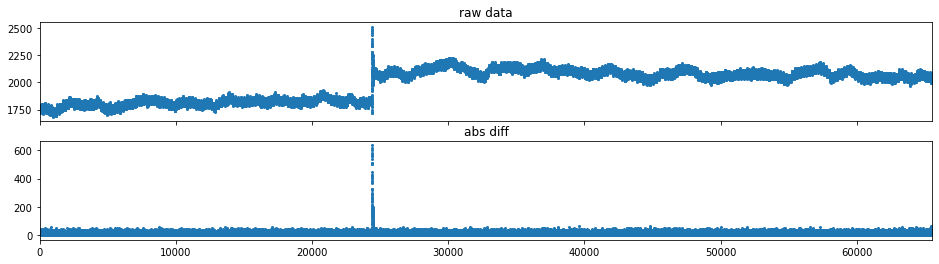

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7481/instability_data/07481_Inst_B1H_Q7_20181128_13h37m14s.h5


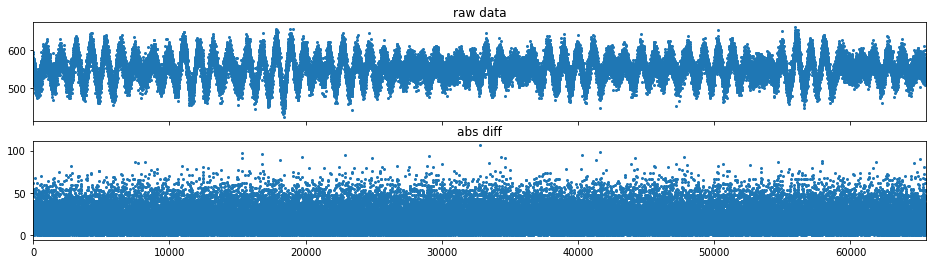

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6243/instability_data/06243_Inst_B1H_Q7_20170925_20h53m14s.h5


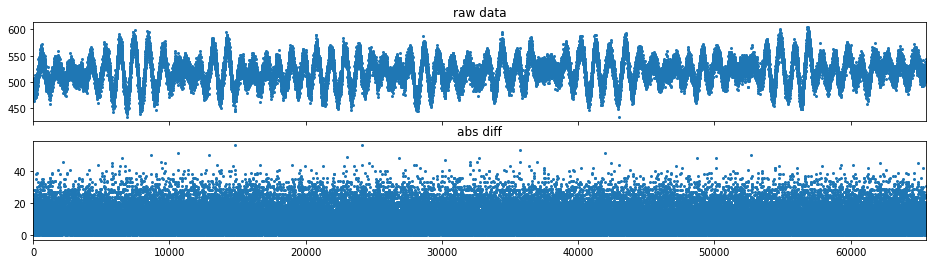

/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/instability_data/06351_Inst_B1H_Q7_20171031_16h58m14s.h5


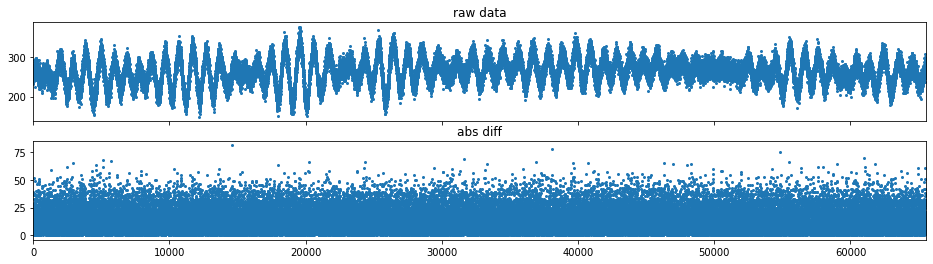

In [9]:
for signal, (_, row) in zip(data, viz_sample.iterrows()):
    print(row["file"])
    fig, axes = plt.subplots(2, sharex=True)
    x = range(len(signal))
    axes[0].scatter(x, signal, s=4)
    axes[0].set_title('raw data')
    
    axes[1].scatter(x[: -1], np.abs(np.diff(signal)), s=4)
    axes[1].set_title('abs diff')
    axes[1].set_xlim([0, len(signal)])
    plt.show()